In [1]:
import yt
## import trident

import numpy as np 

from astropy.table import Table
import astropy.units as u

from consistency import *
from get_halo_center import get_halo_center
from get_proper_box_size import get_proper_box_size
from get_refine_box import get_refine_box

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'

discrete_cmap = mpl.colors.ListedColormap(['#565656','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','darkorange'])
%matplotlib notebook

/Users/molly/anaconda2/envs/astroconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
consistency.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/molly/anaconda2/envs/astroconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/molly/anaconda2/envs/astroconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/molly/anaconda2/envs/astroconda/lib/pyt

In [125]:
ds = yt.load("/Users/molly/foggie/halo_008508/nref11n/natural/RD0020/RD0020")
track_name = "/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track"
print("opening track: " + track_name)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width = get_refine_box(ds, zsnap, track)
# refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
center, velocity = get_halo_center(ds, refine_box_center)


yt : [INFO     ] 2018-06-22 11:22:19,403 Parameters: current_time              = 154.801187733
yt : [INFO     ] 2018-06-22 11:22:19,405 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-06-22 11:22:19,407 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-06-22 11:22:19,408 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-06-22 11:22:19,410 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-06-22 11:22:19,411 Parameters: current_redshift          = 1.99999762534
yt : [INFO     ] 2018-06-22 11:22:19,413 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-06-22 11:22:19,414 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-06-22 11:22:19,416 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 1449/1449 [00:00<00:00, 22173.95it/s]
yt : [INFO     ] 2018-06-22 11:22:19,608 Gathering a field list (this may take a moment.)


opening track: /Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track
('using this loc:', <Table length=1>
   col1     col2     col3     col4     col5     col6     col7    col8
 float64  float64  float64  float64  float64  float64  float64  int64
--------- -------- -------- -------- -------- -------- -------- -----
1.9999999 0.493032 0.487924 0.501169 0.495032 0.489924 0.503169    10)
We have located the main halo at : [0.4940328598022461, 0.4889516830444336, 0.5021543502807617]


yt : [INFO     ] 2018-06-22 11:22:41,219 xlim = 0.487452 0.490452
yt : [INFO     ] 2018-06-22 11:22:41,220 ylim = 0.500654 0.503654
yt : [INFO     ] 2018-06-22 11:22:41,222 xlim = 0.487452 0.490452
yt : [INFO     ] 2018-06-22 11:22:41,224 ylim = 0.500654 0.503654
yt : [INFO     ] 2018-06-22 11:22:41,227 Making a fixed resolution buffer of (('enzo', 'dx')) 800 by 800


['0.091', '0.183', '0.366', '0.732', '1.464', '2.927', '5.855']
(array([1.90734863e-06, 3.81469727e-06, 7.62939453e-06, 1.52587891e-05,
       3.05175781e-05, 6.10351562e-05, 1.22070312e-04]), array([-1.33514404e-05, -1.14440918e-05, -7.62939453e-06,  1.69406589e-21,
        1.52587891e-05,  4.57763672e-05,  1.06811523e-04]))


yt : [INFO     ] 2018-06-22 11:22:41,905 Saving plot RD0020_nref11n_cell_size_dx.png


[2.5e-06 4.5e-06 8.5e-06 1.5e-05 2.8e-05 5.0e-05 9.0e-05]



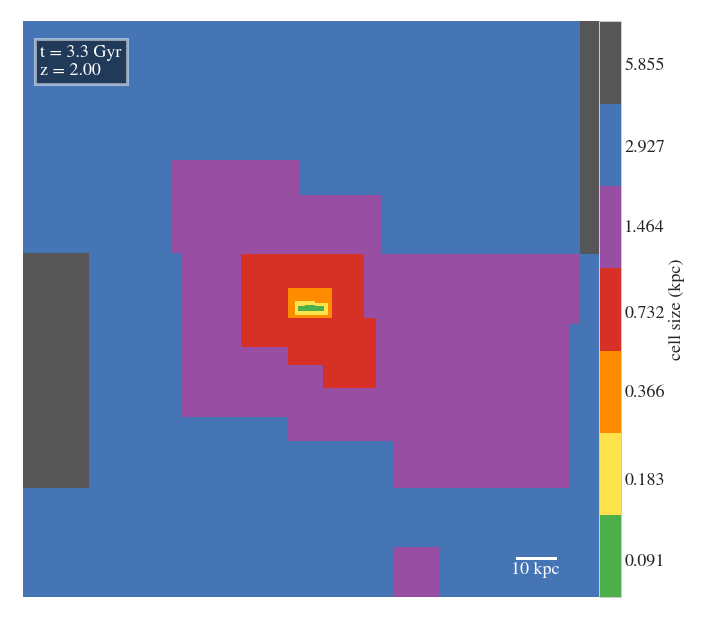

In [126]:
discrete_cmap = mpl.colors.ListedColormap(['darkorange','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','#565656'])
discrete_cmap_r = mpl.colors.ListedColormap(['darkorange','#4575b4',"#ffe34d","#984ea3","#d73027",'#4daf4a','#565656'])
discrete_cmap_rainbow = mpl.colors.ListedColormap(['#4daf4a',"#ffe34d",'darkorange',"#d73027","#984ea3",'#4575b4','#565656'])

cell_kpc = np.unique(refine_box['dy'].in_units('kpc'))
cell_level = np.unique(refine_box[('index','grid_level')])

cell_labels = ['%.3f' % num for num in cell_kpc]
print(cell_labels)
cell_sizes = np.array(np.unique(refine_box['dy']))
#cell_locs = cell_sizes - (np.median(np.power(10.0,np.log10(cell_sizes))) + np.power(10.0,np.log10(cell_sizes) - 1)))
print(cell_sizes, cell_locs)
s = yt.SlicePlot(ds, "x", ('enzo','dx'), center=center, width=1.5*refine_width)
#s = yt.SlicePlot(ds, "y", ('index','grid_level'), center=center, width=1.5*refine_width)
# s.set_cmap(('index','grid_level'),"tab20b")
s.set_cmap('dx', discrete_cmap_rainbow)
s.annotate_timestamp(corner='upper_left', redshift=True, draw_inset_box=True)
s.annotate_scale(size_bar_args={'color':'white'})
#s.set_unit('dy','kpc')
#s.set_cmap(('index','grid_level'), discrete_cmap)
#s.set_zlim(('index','grid_level'),6,11)
#plot = s.plots[('index','grid_level')]
#colorbar.set_ticks([0.093, 2*0.093, 4*0.093, 8*0.093, 16*0.093])
#colorbar.set_ticklabels([0.093, 0.186, 0.374, 0.748, 1.496])
s.hide_axes()
plot = s.plots['dx']
s._setup_plots()
colorbar = plot.cb
colorbar.set_ticks([2.5e-6, 4.5e-6, 8.5e-6, 1.5e-5, 2.8e-5, 5e-5, 9e-5])
colorbar.set_ticklabels(cell_labels)
print(colorbar.get_ticks())
colorbar.set_label('cell size (kpc)')
s.save('RD0020_nref11n_cell_size_dx.png')
s.show()

In [119]:
ds = yt.load("/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/RD0020/RD0020")
track_name = "/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track"
print("opening track: " + track_name)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width = get_refine_box(ds, zsnap, track)
# refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
center, velocity = get_halo_center(ds, refine_box_center)


yt : [INFO     ] 2018-06-22 11:19:27,694 Parameters: current_time              = 154.801032717
yt : [INFO     ] 2018-06-22 11:19:27,695 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-06-22 11:19:27,697 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-06-22 11:19:27,699 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-06-22 11:19:27,701 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-06-22 11:19:27,702 Parameters: current_redshift          = 1.99999968795
yt : [INFO     ] 2018-06-22 11:19:27,704 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-06-22 11:19:27,706 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-06-22 11:19:27,707 Parameters: hubble_constant           = 0.695
Parsing Hierarchy :   0%|          | 0/4574 [00:00<?, ?it/s]

opening track: /Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track
('using this loc:', <Table length=1>
   col1     col2     col3     col4     col5     col6     col7    col8
 float64  float64  float64  float64  float64  float64  float64  int64
--------- -------- -------- -------- -------- -------- -------- -----
2.0499999 0.493091 0.488119 0.501099 0.495091 0.490119 0.503099    10)


Parsing Hierarchy : 100%|██████████| 4574/4574 [00:00<00:00, 6418.59it/s]
yt : [INFO     ] 2018-06-22 11:19:28,741 Gathering a field list (this may take a moment.)


We have located the main halo at : [0.4940309524536133, 0.48897266387939453, 0.5021486282348633]


['0.091', '0.183', '0.366', '0.732', '1.464', '2.927', '5.855']


yt : [INFO     ] 2018-06-22 11:21:29,066 xlim = 0.487473 0.490473
yt : [INFO     ] 2018-06-22 11:21:29,068 ylim = 0.500649 0.503649
yt : [INFO     ] 2018-06-22 11:21:29,070 xlim = 0.487473 0.490473
yt : [INFO     ] 2018-06-22 11:21:29,071 ylim = 0.500649 0.503649
yt : [INFO     ] 2018-06-22 11:21:29,074 Making a fixed resolution buffer of (('enzo', 'dx')) 800 by 800


(array([1.90734863e-06, 3.81469727e-06]), array([-1.33514404e-05, -1.14440918e-05, -7.62939453e-06,  1.69406589e-21,
        1.52587891e-05,  4.57763672e-05,  1.06811523e-04]))


yt : [INFO     ] 2018-06-22 11:21:29,694 Saving plot RD0020_nref11n_nref10f_cell_size_dx.png


[2.5e-06 4.5e-06 8.5e-06 1.5e-05 2.8e-05 5.0e-05 9.0e-05]



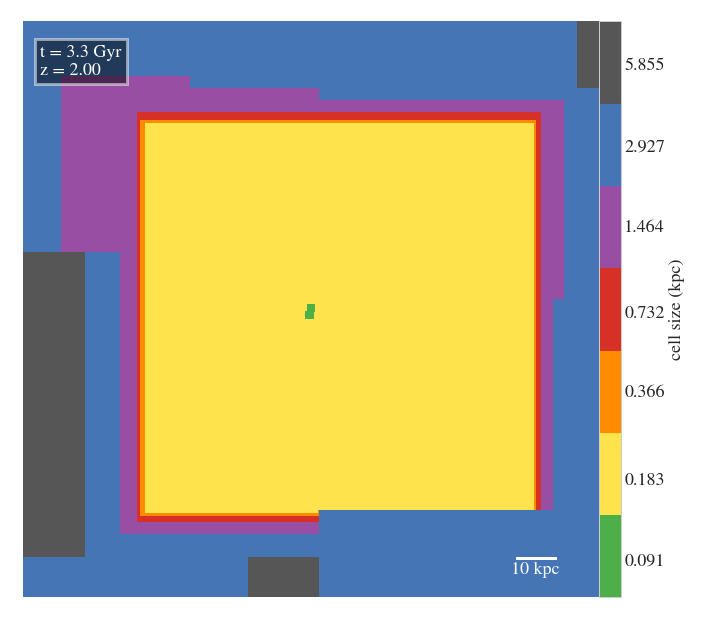

In [122]:
discrete_cmap = mpl.colors.ListedColormap(['darkorange','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','#565656'])
discrete_cmap_r = mpl.colors.ListedColormap(['darkorange','#565656','#4575b4',"#ffe34d","#984ea3","#d73027",'#4daf4a'])

#cell_kpc = np.unique(refine_box['dy'].in_units('kpc'))
#cell_level = np.unique(refine_box[('index','grid_level')])

cell_labels = ['%.3f' % num for num in cell_kpc]
print(cell_labels)
cell_sizes = np.array(np.unique(refine_box['dy']))
print(cell_sizes, cell_locs)
# s = yt.SlicePlot(ds, "y", 'dy', center=center, width=1.5*refine_width)
s = yt.SlicePlot(ds, "x", ('enzo','dx'), center=center, width=1.5*refine_width)
s.set_cmap('dx', discrete_cmap_rainbow)
s.hide_axes()
s.annotate_timestamp(corner='upper_left', redshift=True, draw_inset_box=True)
s.annotate_scale(size_bar_args={'color':'white'})
plot = s.plots['dx']
s._setup_plots()
colorbar = plot.cb
colorbar.set_ticks([2.5e-6, 4.5e-6, 8.5e-6, 1.5e-5, 2.8e-5, 5e-5, 9e-5])
colorbar.set_ticklabels(cell_labels)
print(colorbar.get_ticks())
colorbar.set_label('cell size (kpc)')
s.save('RD0020_nref11n_nref10f_cell_size_dx.png')
s.show()

In [2]:
ds = yt.load("/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11c_nref9f_selfshield_z6/DD0065/DD0065")
track_name = "/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11c_nref9f_selfshield_z6/halo_track"
print("opening track: " + track_name)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width = get_refine_box(ds, zsnap, track)
# refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
center, velocity = get_halo_center(ds, refine_box_center)


yt : [INFO     ] 2018-06-07 09:38:28,796 Parameters: current_time              = 49.3165278183
yt : [INFO     ] 2018-06-07 09:38:28,797 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-06-07 09:38:28,798 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-06-07 09:38:28,799 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-06-07 09:38:28,801 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-06-07 09:38:28,801 Parameters: current_redshift          = 5.48941627331
yt : [INFO     ] 2018-06-07 09:38:28,802 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-06-07 09:38:28,803 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-06-07 09:38:28,804 Parameters: hubble_constant           = 0.695
Parsing Hierarchy :  58%|█████▊    | 2688/4650 [00:00<00:00, 26869.01it/s]

opening track: /astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11c_nref9f_selfshield_z6/halo_track
('using this loc:', <Table length=1>
     col1       col2     col3     col4     col5     col6     col7    col8
   float64    float64  float64  float64  float64  float64  float64  int64
------------- -------- -------- -------- -------- -------- -------- -----
5.49999996364 0.495618 0.495559 0.497327 0.497618 0.497559 0.499327     9)


Parsing Hierarchy : 100%|██████████| 4650/4650 [00:00<00:00, 19019.41it/s]
yt : [INFO     ] 2018-06-07 09:38:29,368 Gathering a field list (this may take a moment.)


We have located the main halo at : [0.49568843841552734, 0.49574947357177734, 0.49895763397216797]


yt : [INFO     ] 2018-06-07 09:43:28,781 xlim = 0.494327 0.502327
yt : [INFO     ] 2018-06-07 09:43:28,782 ylim = 0.492618 0.500618
yt : [INFO     ] 2018-06-07 09:43:28,784 xlim = 0.494327 0.502327
yt : [INFO     ] 2018-06-07 09:43:28,785 ylim = 0.492618 0.500618
yt : [INFO     ] 2018-06-07 09:43:28,787 Making a fixed resolution buffer of (('gas', 'dy')) 800 by 800


('using this loc:', <Table length=1>
     col1       col2    col3     col4    col5    col6     col7   col8
   float64    float64 float64  float64 float64 float64  float64 int64
------------- ------- -------- ------- ------- -------- ------- -----
6.04999996364 0.49326 0.496891 0.49671 0.49526 0.498891 0.49871     9)
[0.496618, 0.49655899999999997, 0.49832700000000002]



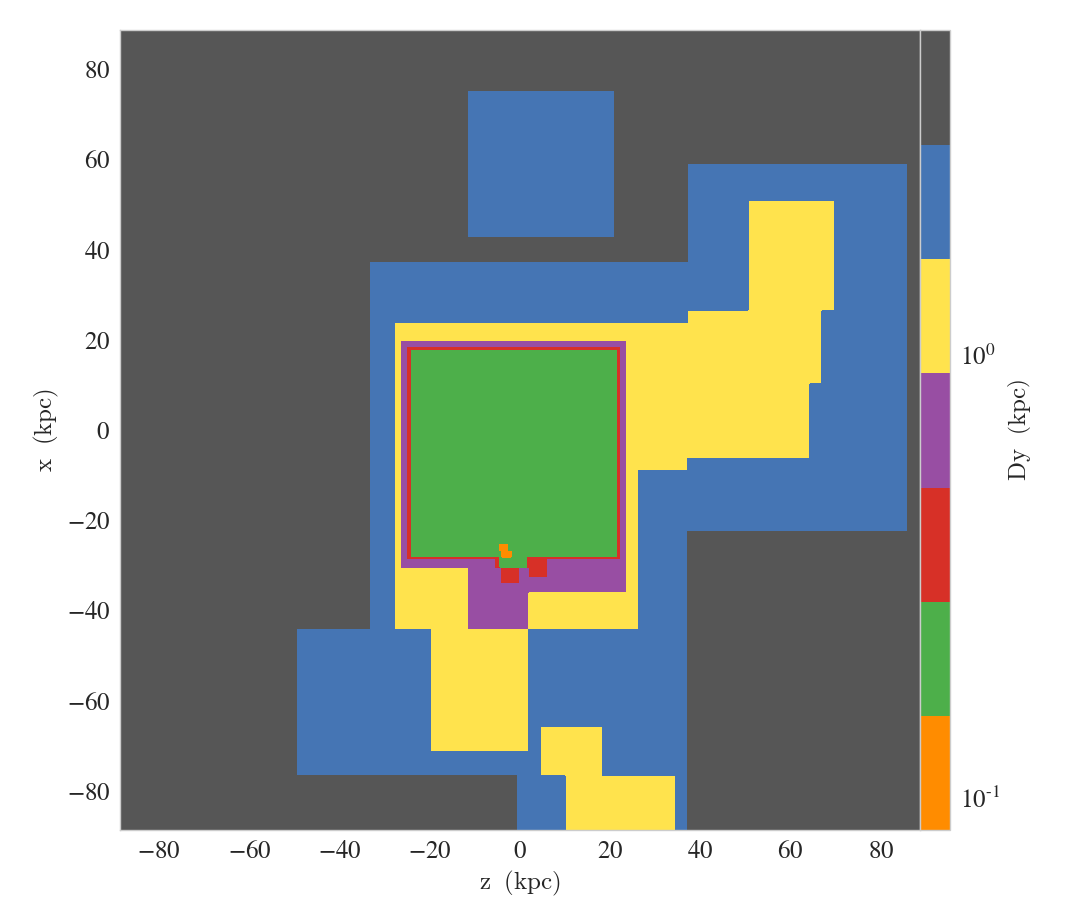

In [11]:
fart_box_left = [0.493265, 0.49685, 0.496728]
fart_box_right = [ 0.495265, 0.49885, 0.498728 ]

fart_box, fart_box_center, refine_width = get_refine_box(ds, 6.0, track)

print refine_box_center
discrete_cmap = mpl.colors.ListedColormap(['darkorange','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','#565656'])

# s = yt.SlicePlot(ds, "y", ('index','grid_level'), center=refine_box_center, width=4*refine_width)
s = yt.SlicePlot(ds, "y", 'dy', center=refine_box_center, width=4*refine_width)
# s.set_cmap(('index','grid_level'),discrete_cmap)
s.set_cmap('dy', discrete_cmap)
s.set_unit('dy','kpc')
#s.set_cmap(('index','grid_level'), discrete_cmap)
#s.set_zlim(('index','grid_level'),6,11)
#plot = s.plots[('index', 'grid_level')]
#s._setup_plots()
#colorbar = plot.cb
#colorbar.set_ticks([0.093, 2*0.093, 4*0.093, 8*0.093, 16*0.093])
#colorbar.set_ticklabels([0.093, 0.186, 0.374, 0.748, 1.496])
#colorbar.set_label('grid level')
#s.save('RD0014_nref11n_nref10f_selfshield_z6_grid_level.png')
s.show()

In [11]:
ds = yt.load("/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11c_nref9f_selfshield_z6/RD0014/RD0014")
track_name = "/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11c_nref9f_selfshield_z6/halo_track"
print("opening track: " + track_name)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width = get_refine_box(ds, zsnap, track)
# refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
center, velocity = get_halo_center(ds, refine_box_center)


yt : [INFO     ] 2018-06-05 14:06:44,450 Parameters: current_time              = 72.7890686357
yt : [INFO     ] 2018-06-05 14:06:44,451 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-06-05 14:06:44,452 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-06-05 14:06:44,453 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-06-05 14:06:44,454 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-06-05 14:06:44,455 Parameters: current_redshift          = 3.99999897423
yt : [INFO     ] 2018-06-05 14:06:44,456 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-06-05 14:06:44,457 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-06-05 14:06:44,458 Parameters: hubble_constant           = 0.695
Parsing Hierarchy :  37%|███▋      | 2915/7984 [00:00<00:00, 29148.85it/s]

opening track: /astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11c_nref9f_selfshield_z6/halo_track
('using this loc:', <Table length=1>
     col1       col2     col3     col4     col5     col6     col7    col8
   float64    float64  float64  float64  float64  float64  float64  int64
------------- -------- -------- -------- -------- -------- -------- -----
4.04999996364 0.494576 0.493213 0.498535 0.496576 0.495213 0.500535     9)


Parsing Hierarchy : 100%|██████████| 7984/7984 [00:00<00:00, 28729.98it/s]
yt : [INFO     ] 2018-06-05 14:06:45,328 Gathering a field list (this may take a moment.)


We have located the main halo at : [0.49541378021240234, 0.49414348602294922, 0.49955463409423828]


yt : [INFO     ] 2018-06-07 09:47:49,766 xlim = 0.496827 0.499827
yt : [INFO     ] 2018-06-07 09:47:49,767 ylim = 0.495118 0.498118
yt : [INFO     ] 2018-06-07 09:47:49,768 xlim = 0.496827 0.499827
yt : [INFO     ] 2018-06-07 09:47:49,769 ylim = 0.495118 0.498118
yt : [INFO     ] 2018-06-07 09:47:49,772 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



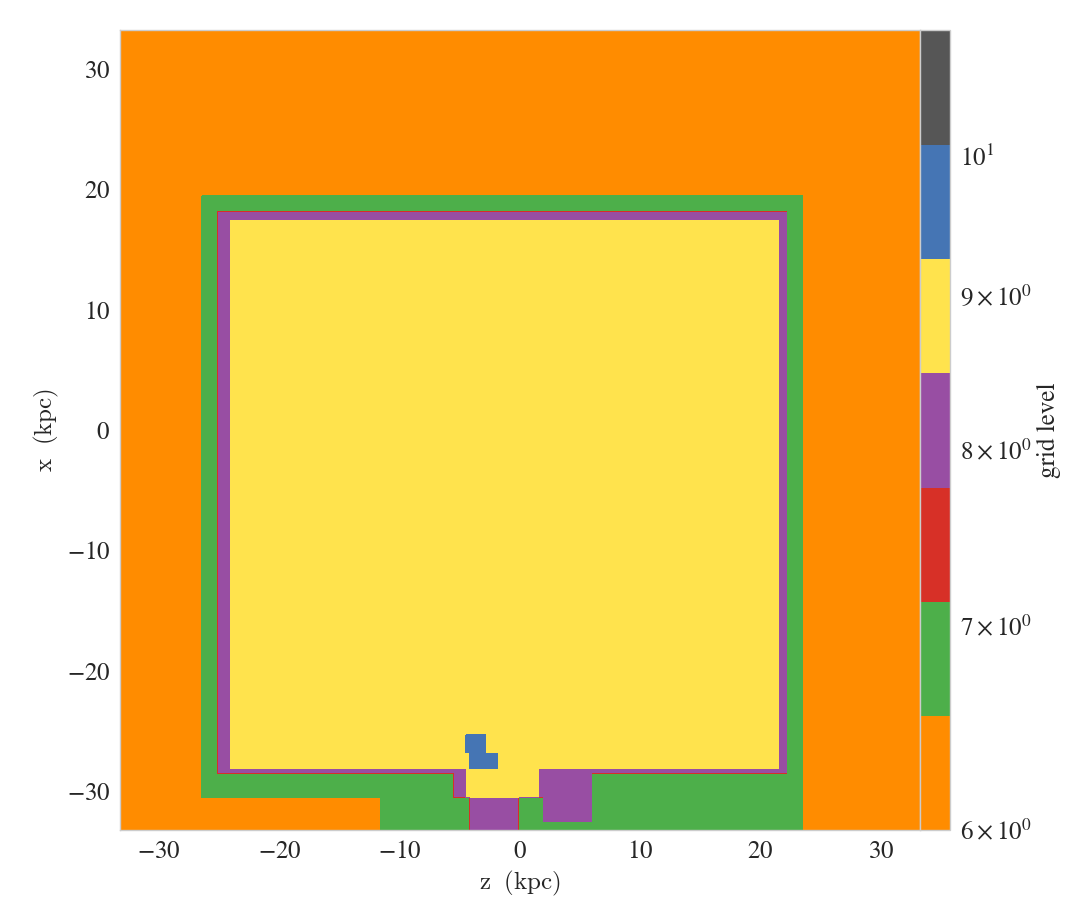

In [13]:
discrete_cmap = mpl.colors.ListedColormap(['darkorange','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','#565656'])

s = yt.SlicePlot(ds, "y", ('index','grid_level'), center=refine_box_center, width=1.5*refine_width)
s.set_cmap(('index','grid_level'),discrete_cmap)
# s.set_cmap('dy', discrete_cmap)
# s.set_unit('dy','kpc')
#s.set_cmap(('index','grid_level'), discrete_cmap)
s.set_zlim(('index','grid_level'),6,11)
plot = s.plots[('index', 'grid_level')]
s._setup_plots()
colorbar = plot.cb
#colorbar.set_ticks([0.093, 2*0.093, 4*0.093, 8*0.093, 16*0.093])
#colorbar.set_ticklabels([0.093, 0.186, 0.374, 0.748, 1.496])
colorbar.set_label('grid level')
# s.save('RD0014_nref11c_nref9f_selfshield_z6_grid_level.png')
s.show()

In [14]:
ds = yt.load("/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11n_nref10f_selfshield_z6/DD0052/DD0052")
track_name = "/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11n_nref10f_selfshield_z6/halo_track"
print("opening track: " + track_name)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width = get_refine_box(ds, zsnap, track)
# refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
center, velocity = get_halo_center(ds, refine_box_center)


yt : [INFO     ] 2018-06-07 09:57:57,467 Parameters: current_time              = 46.0665278183
yt : [INFO     ] 2018-06-07 09:57:57,468 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-06-07 09:57:57,470 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-06-07 09:57:57,471 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-06-07 09:57:57,472 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-06-07 09:57:57,473 Parameters: current_redshift          = 5.79203476016
yt : [INFO     ] 2018-06-07 09:57:57,474 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-06-07 09:57:57,475 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-06-07 09:57:57,475 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 4053/4053 [00:00<00:00, 29657.78it/s]


opening track: /astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11n_nref10f_selfshield_z6/halo_track
('using this loc:', <Table length=1>
     col1       col2     col3     col4     col5     col6     col7    col8
   float64    float64  float64  float64  float64  float64  float64  int64
------------- -------- -------- -------- -------- -------- -------- -----
5.79999996364 0.494206 0.496334 0.496968 0.496206 0.498334 0.498968    10)


yt : [INFO     ] 2018-06-07 09:57:57,981 Gathering a field list (this may take a moment.)


We have located the main halo at : [0.49573040008544922, 0.49596309661865234, 0.49886035919189453]


yt : [INFO     ] 2018-06-07 10:00:18,600 xlim = 0.493968 0.501968
yt : [INFO     ] 2018-06-07 10:00:18,600 ylim = 0.491206 0.499206
yt : [INFO     ] 2018-06-07 10:00:18,602 xlim = 0.493968 0.501968
yt : [INFO     ] 2018-06-07 10:00:18,603 ylim = 0.491206 0.499206
yt : [INFO     ] 2018-06-07 10:00:18,605 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



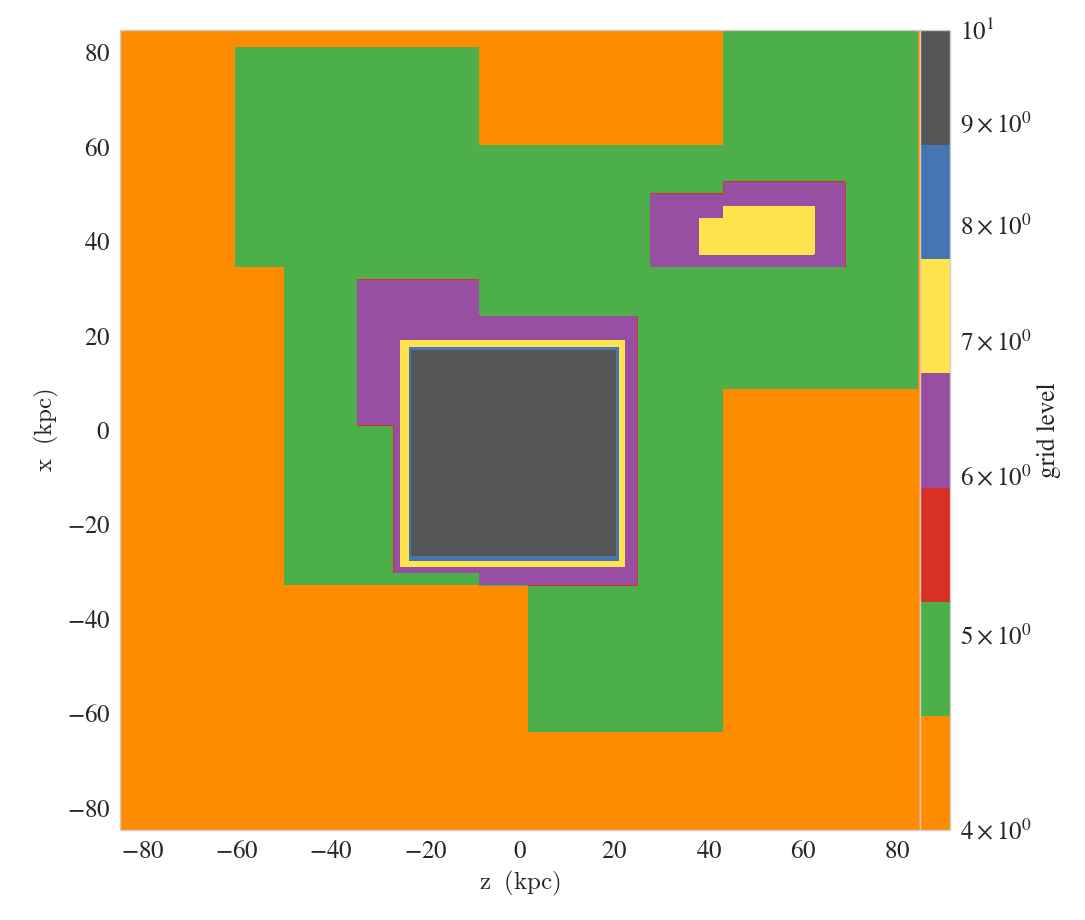

In [17]:
discrete_cmap = mpl.colors.ListedColormap(['darkorange','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','#565656'])

s = yt.SlicePlot(ds, "y", ('index','grid_level'), center=refine_box_center, width=4*refine_width)
s.set_cmap(('index','grid_level'),discrete_cmap)
# s.set_cmap('dy', discrete_cmap)
# s.set_unit('dy','kpc')
#s.set_cmap(('index','grid_level'), discrete_cmap)
#s.set_zlim(('index','grid_level'),6,11)
plot = s.plots[('index', 'grid_level')]
s._setup_plots()
colorbar = plot.cb
#colorbar.set_ticks([0.093, 2*0.093, 4*0.093, 8*0.093, 16*0.093])
#colorbar.set_ticklabels([0.093, 0.186, 0.374, 0.748, 1.496])
colorbar.set_label('grid level')
## s.save('RD0014_nref11n_selfshield_z15_grid_level.png')
s.show()

In [117]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('al